<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision tree 모형 (의사결정나무 모형)

- tree 모형은 데이터를 여러 기준에 따라 분할하면서 예측을 수행하는 비선형 모형입니다.

- 트리 구조를 의사결정 규칙을 시각화 할 수 있어서 해석이 쉽다는 장점이 있습니다.

- 분류(classification)에서 자주 쓰이고, 회귀(regression tree) 모형에서 쓰일 수 있음


### 왜 경제학에서 tree 모형이 중요한가?

- 경제학 데이터는 복잡한 의사결정을 거치고
- 시장 참여자들간의 복잡한 상호작용이 수반됨

- 선형 회귀 혹은 선형 모형의 한계가 명확하다.

- 예시:
  - 은행 대출 신청하는 은행 고객의 대출 승인 여부를 예측. 파산하는 경우를 예측
  - 지역별로 소득수준에 따라서 소비패턴을 분류
  - 실업률에 어떤 요소들이 영향을 주는지 파악 등.

---

- 연체여부를 담고 있는 `default.csv` 를 이용하여 default 여부를 예측하는 의사결정나무 모형을 학습해 봄



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
df['default'] = df['default'].map({'Yes':1, 'No':0})
df['student'] = df['student'].map({'Yes':1, 'No':0})
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [8]:
# 결측치 있는지 확인
print(df.isnull().sum())


default    0
student    0
balance    0
income     0
dtype: int64


In [9]:
# features & target(dependent) variable
y = df['default']
X = df[['student', 'balance', 'income']]

In [14]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.9723333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2906
           1       0.63      0.29      0.39        94

    accuracy                           0.97      3000
   macro avg       0.80      0.64      0.69      3000
weighted avg       0.97      0.97      0.97      3000



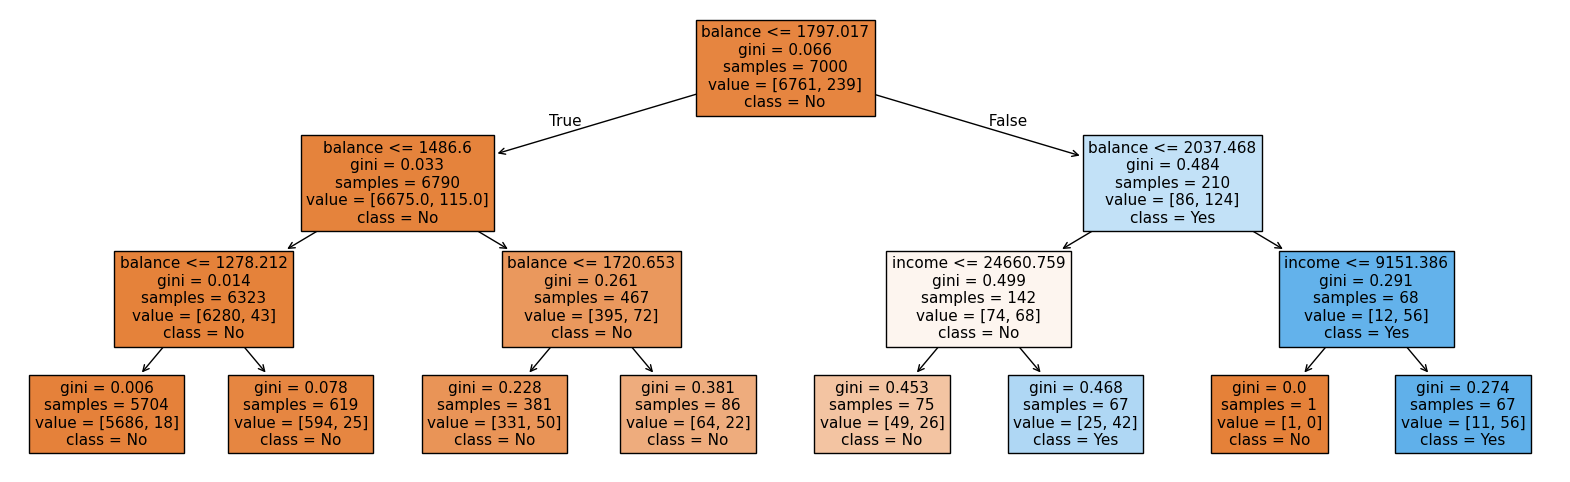

In [22]:
plt.figure(figsize=(20, 6))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          max_depth = 3,
          fontsize = 11)
plt.show()

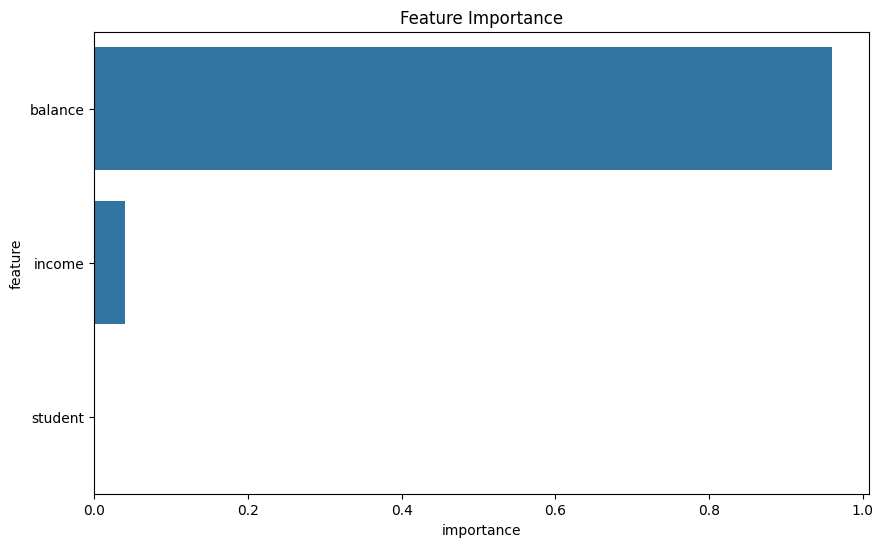

In [23]:
# feature importance

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# feature importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


- 단점이 의사결정나무모형 같은 경우에는 과적합이 되는 경향이 있음.

- 램덤 포레스트(random forest).
- 여러 개의 트리를 만들어가지고, 이걸 합함(ensemble)
- 과적합의 위험이 낮고, 예측력이 높아짐
- 노이즈에 대해서 민감도가 강인함(robust)
- 계산속도가 느림.

---

### 램던 포레스트 모형

- 의사결정나무모형을 앙상블하여 예측력을 높이는 기계학습 모형
- 무작위로 선택된 데이터(bagging)와 무작위로 선택된 변수, 특성으로 훈련하고
- 많은 나무모형 중에서 분류의 경우에는 다수결(majority rule), 회귀문제에 있어서는 평균을 사용하게 됨


- 작동원리는 크게 보면 3가지 정도로 볼 수 이씅ㅁ
  - 백깅(bagging, boostrap sampling): 전체 데이터에서 복원 추출하여 서로 상이한 표본 집합을 생성

  - feature sampling: 각 분기마다 전체 변수 중 일부만 램덤하게 선택하여 분할 기준을 설정

  - ensemble: 다수의 트리로부터 결과를 집계(통합). 분류의 경우에는 다수결, 회귀의 경우에는 평균을 취함




- 실업률, 이직률 예측. 부도예측, 신용점수 분류. 경기침체가 있을 것인지. 복지 사각지대 발굴.

- 장점: 예측 성능이 개선, 과적합 방지, 변수가 중요한지 분석도 가능, 이상치나 결측값이 있을 때 상당히 강건하다.

- 단점: 모델 해석 그 자체가 어려움. 훈련 시간이 길고 메모리 사용이 많음. 트리수가 많아질수록 속도가 빠르게 저하됨

---
- `boston.csv` 자료 이용해서 주택 가격(medv)를 예측하는 모형을 랜덤 포레스트 모형을 이용하여 훈련해보겠음

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/Boston.csv')

df.head()



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [29]:
target_column = 'medv' if 'medv' in df.columns else df.columns[-1]
y = df[target_column]

X = df.drop(columns=[target_column])


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [30]:
# 훈련/테스트 자료 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 6, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [33]:
# 예측 및 평가
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse,2))
print("R-squared:", round(r2,2))

Mean Squared Error: 11.0
R-squared: 0.85


In [38]:
X_single = df[['rm']]
y = df['medv']

In [39]:
# 나머지 코드는 동일
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

forest = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
forest.fit(X_train, y_train)

X_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)

y_tree_pred = tree.predict(X_range)
y_forest_pred = forest.predict(X_range)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


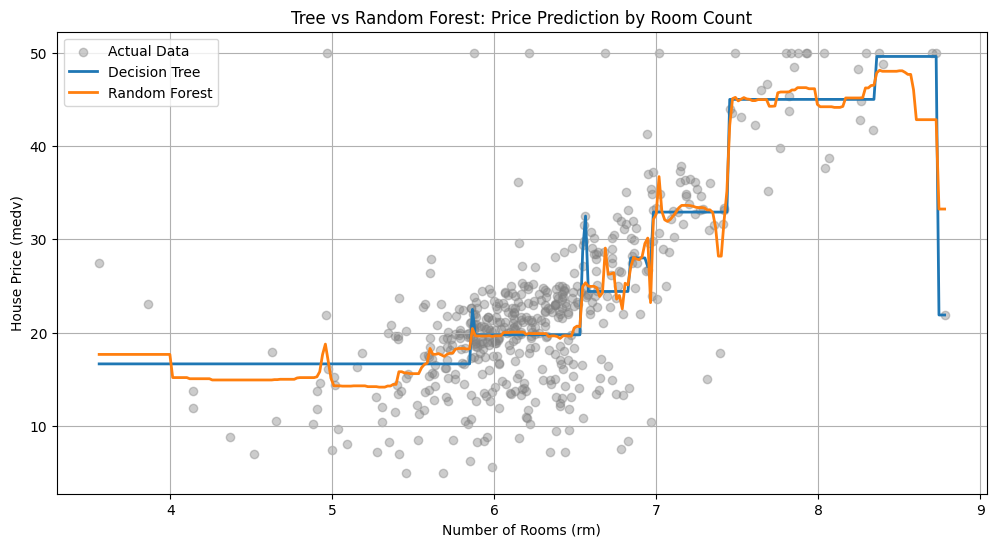

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(X_single, y, label="Actual Data", alpha=0.4, color='gray')
plt.plot(X_range, y_tree_pred, label="Decision Tree", linewidth=2)
plt.plot(X_range, y_forest_pred, label="Random Forest", linewidth=2)

plt.xlabel("Number of Rooms (rm)")
plt.ylabel("House Price (medv)")
plt.title("Tree vs Random Forest: Price Prediction by Room Count")
plt.legend()
plt.grid(True)
plt.show()
